# TP4

In [17]:
library(dplyr)
library(rstatix)
library(graphics)
library(ggplot2)
library(ggpubr)

In [13]:
score_iq <- read.csv("data/score_iq.csv", header = TRUE)
head(score_iq)

,Groupe,score_iq
,<dbl>,<dbl>
1,1,44
2,1,40
3,1,44
4,1,39
5,1,25
6,1,37


In [15]:
data <- data.frame(score=score_iq$score_iq, group=factor(score_iq$Groupe))

levels(data$group)

[1] "1" "2" "3"

group,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,score,15,35.800,7.794
2,score,15,35.867,6.937
3,score,15,48.200,2.396


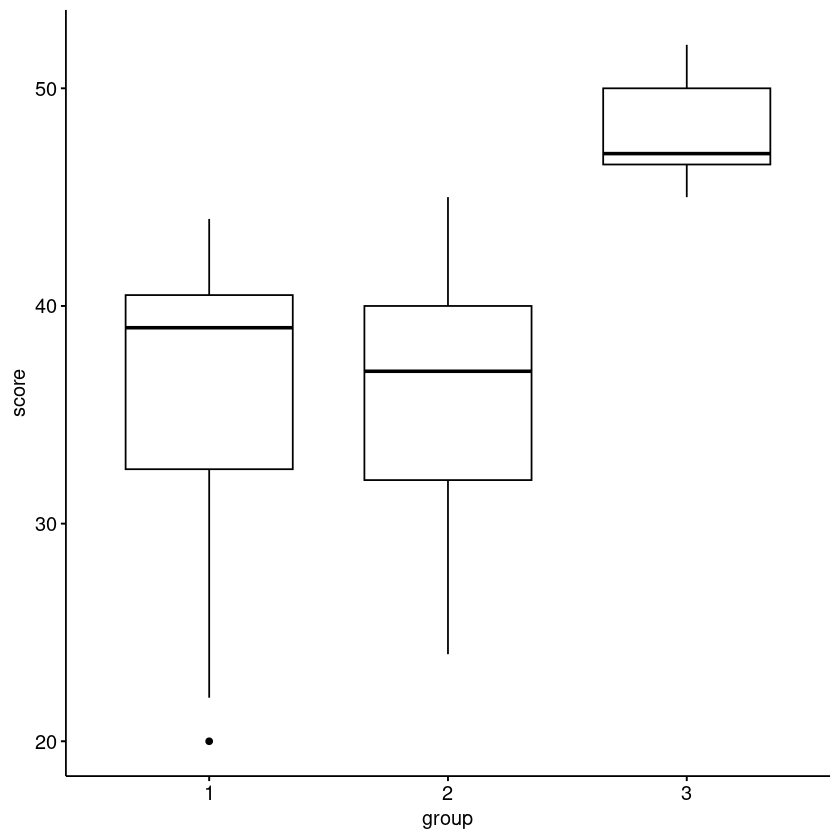

In [18]:
data %>% group_by(group) %>% get_summary_stats(score, type = "mean_sd")
ggboxplot(data, x = "group", y = "score")

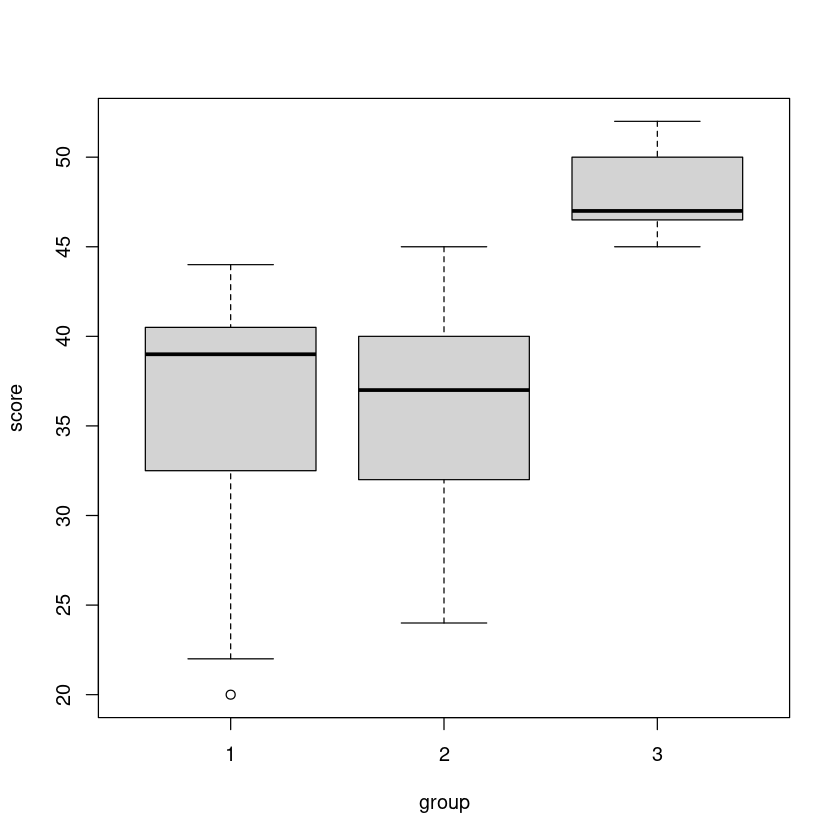

In [19]:
plot(score ~group, data=data)
# v. Outliers : data %>% gr

In [20]:
data %>%
  group_by(group) %>%
  identify_outliers(score)

group,score,is.outlier,is.extreme
<fct>,<dbl>,<lgl>,<lgl>
1,20,TRUE,FALSE


group,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
1,score,0.8463537,0.0154261
2,score,0.9099723,0.1352772
3,score,0.9171806,0.1744485


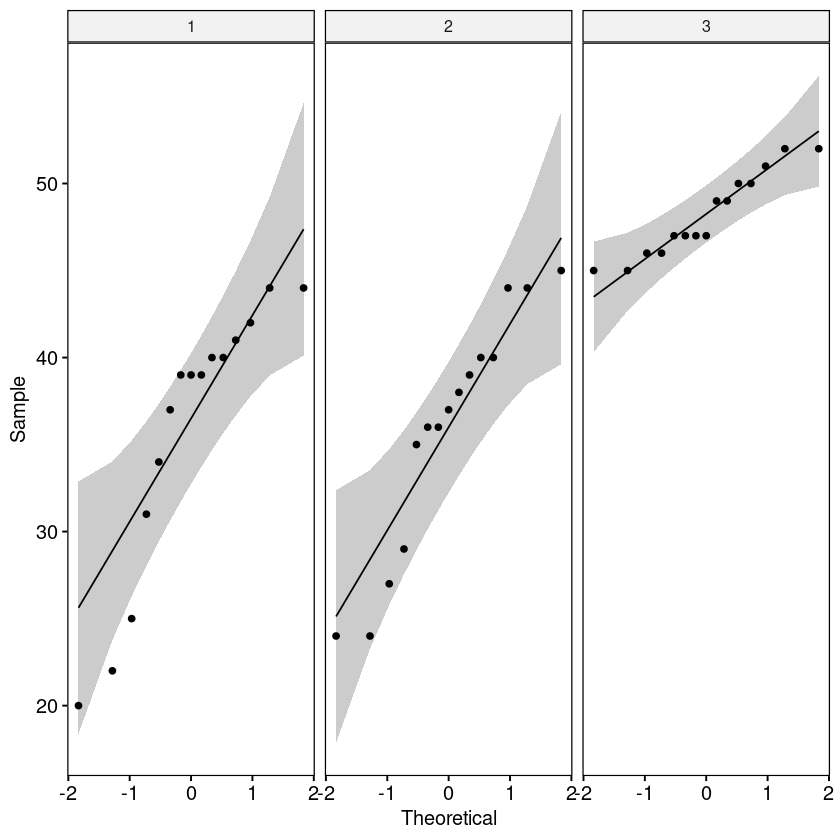

In [21]:
data %>% group_by(group) %>% shapiro_test(score)
ggqqplot(data, "score", facet.by = "group")

In [22]:
bartlett.test(data$score ~data$group)
data %>% levene_test(score ~ group)


	Bartlett test of homogeneity of variances

data:  data$score by data$group
Bartlett's K-squared = 16.288, df = 2, p-value = 0.0002905


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,42,2.728506,0.07690009


In [23]:
rs.aov <- Anova(lm(score~group, data=data))
anova_summary(rs.aov)
rs.aov <- aov(score ~ group, data )
summary(rs.aov)
#
rs.aov <- data %>% anova_test(score ~ group)
rs.aov
#
rs.aovw <- data %>% welch_anova_test(score ~group)
rs.aovw

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,group,2,42,20.016,7.84e-07,*,0.488


            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2   1529   764.7   20.02 7.84e-07 ***
Residuals   42   1604    38.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,group,2,42,20.016,7.84e-07,*,0.488


,.y.,n,statistic,DFn,DFd,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,score,45,34.14,2,22.03354,1.78e-07,Welch ANOVA


,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,group,1,2,0,0.06666667,-5.416543,5.549877,1.00e+00,ns
2,group,1,3,0,12.40000000,6.916790,17.883210,6.24e-06,****
3,group,2,3,0,12.33333333,6.850123,17.816543,6.88e-06,****


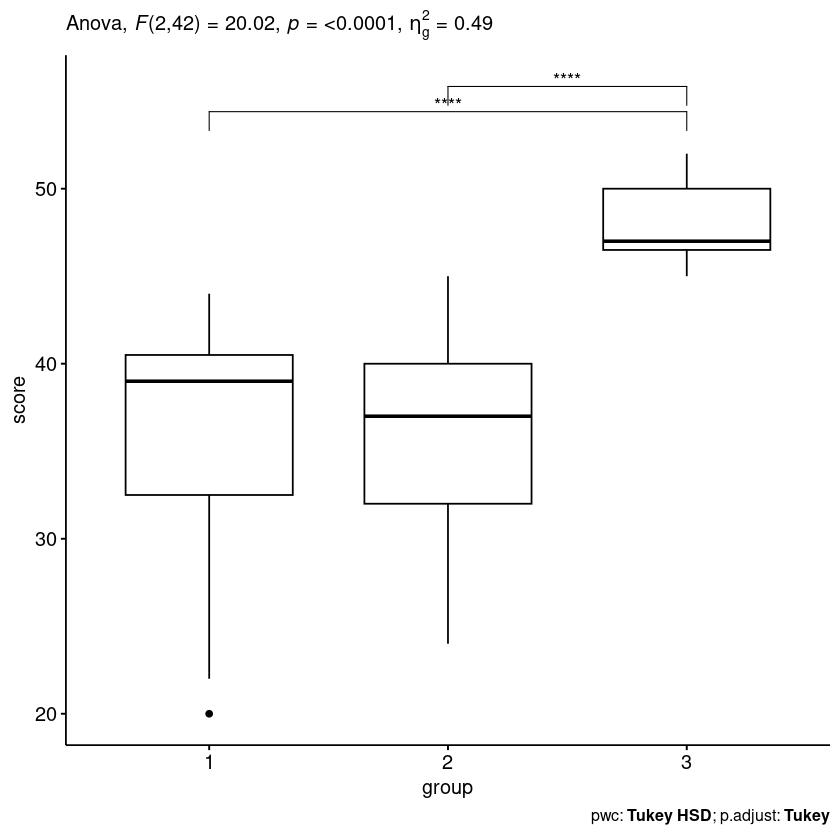

In [24]:
rs.tk <- data %>% tukey_hsd(score ~ group)
rs.tk
rs.tk2 <- rs.tk %>% add_xy_position(x = "group")
ggboxplot(data, x = "group", y = "score") + stat_pvalue_manual(rs.tk2, hide.ns = TRUE) + labs(
subtitle = get_test_label(rs.aov, detailed = TRUE),caption = get_pwc_label(rs.tk2))

variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(mdl),0.9216457,0.004809154


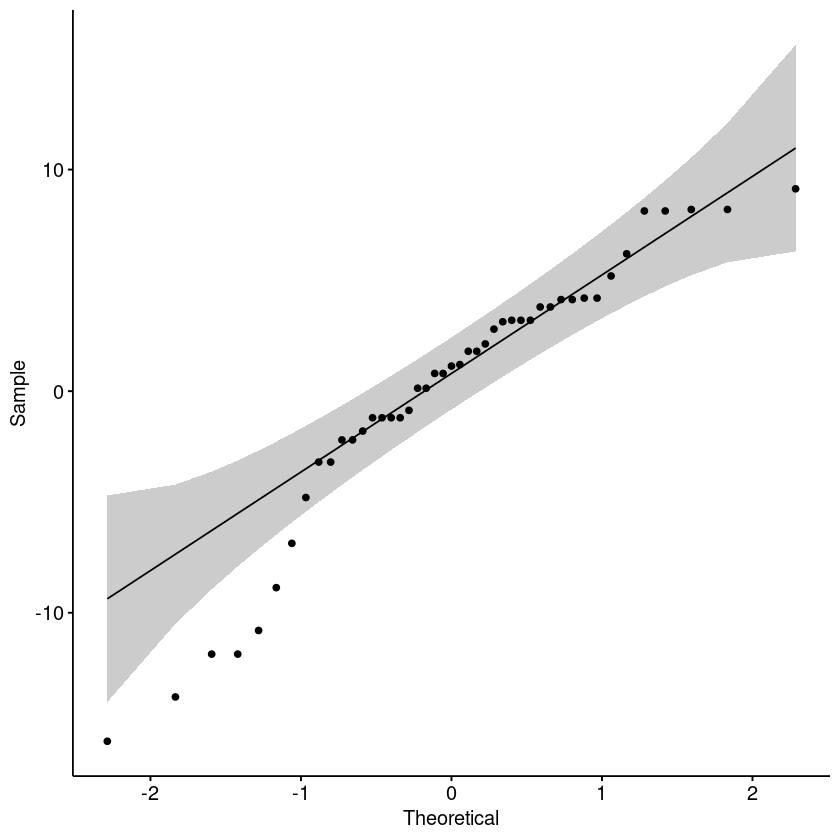

In [25]:
# Construire le modèle linéaire
mdl <- lm(score ~ group, data = data)
# Créer un QQ plot des résidus
ggqqplot(residuals(mdl))
# Calculer le test de normalité de Shapiro-Wilk
shapiro_test(residuals(mdl))

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,score,45,29.20498,2,4.55e-07,Kruskal-Wallis


,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
1,score,45,0.6477376,eta2[H],large


,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,score,1,2,15,15,-0.1392437,8.892576e-01,1.000000e+00,ns
2,score,1,3,15,15,4.6089669,4.046747e-06,1.214024e-05,****
3,score,2,3,15,15,4.7482106,2.052242e-06,6.156727e-06,****


,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,score,1,2,15,15,118,8.35e-01,1.00e+00,ns
2,score,1,3,15,15,0,3.22e-06,9.66e-06,****
3,score,2,3,15,15,1,3.92e-06,1.18e-05,****


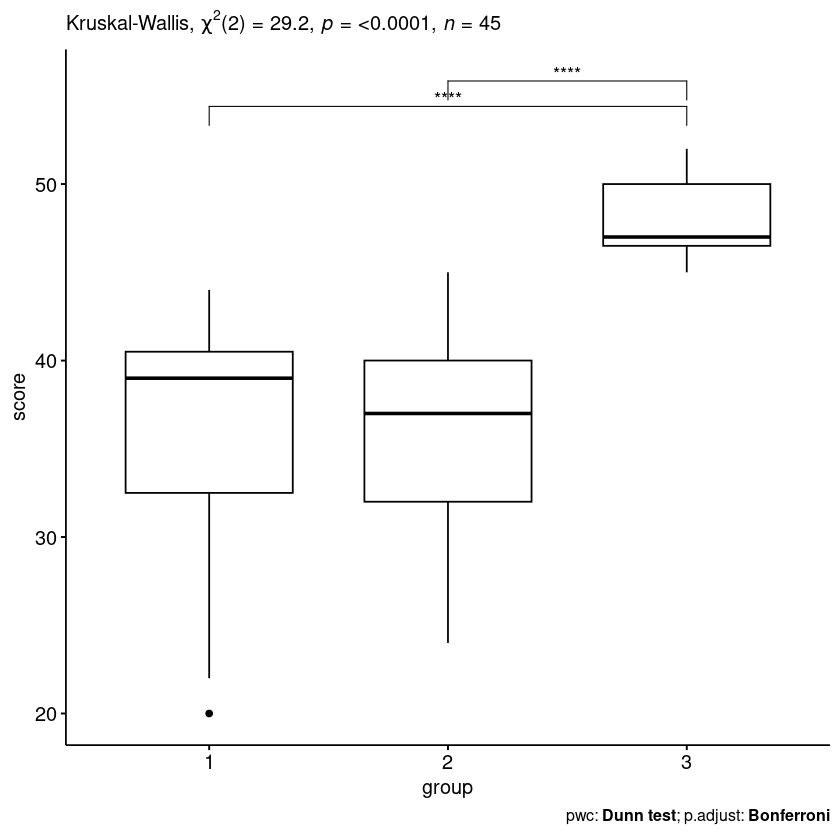

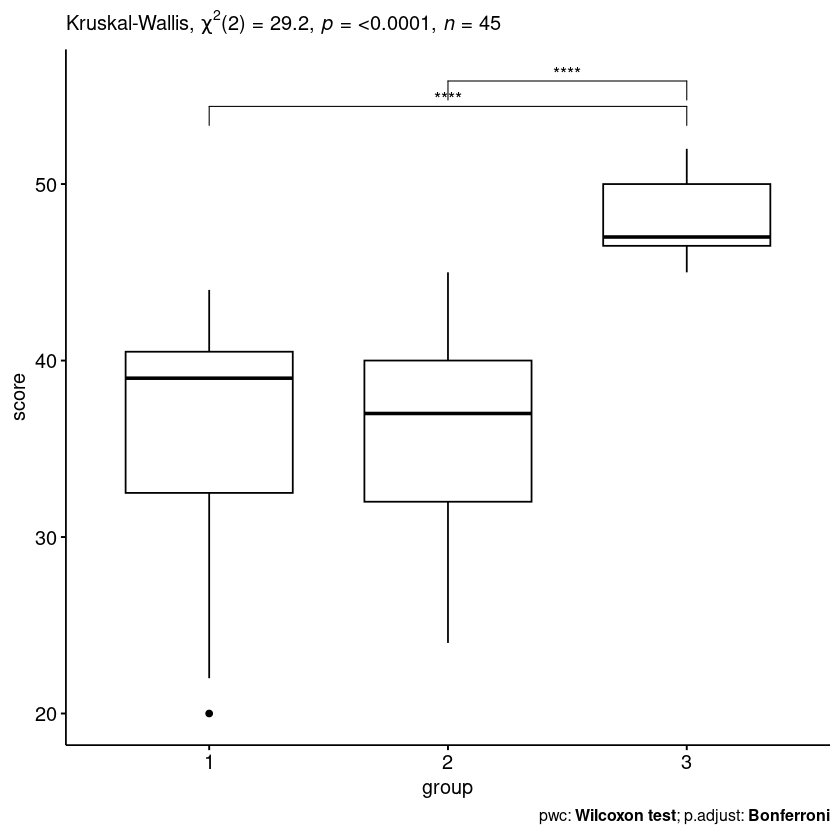

In [26]:
rs.krl <- data %>% kruskal_test(score ~ group)
rs.krl
# taille de l'effet
#Les valeurs d’interprétation couramment utilisées dans la littérature sont : 0,01- < 0,06 (petit
# effet), 0,06 - < 0,14 (effet modéré) et >= 0,14 (effet important).
data %>% kruskal_effsize(score ~ group)
#test de Dunn post-hoc
rs.dnt <- data %>% dunn_test(score ~ group, p.adjust.method = "bonferroni")
rs.dnt
rs.dnt2 <- rs.dnt %>% add_xy_position(x = "group")
ggboxplot(data, x = "group", y = "score") + stat_pvalue_manual(rs.dnt2, hide.ns = TRUE) + labs(
subtitle = get_test_label(rs.krl, detailed = TRUE),caption = get_pwc_label(rs.dnt2))
# ou bien test de Wilcoxon
rs.wxt <- data %>% wilcox_test(score ~ group, p.adjust.method = "bonferroni")
rs.wxt
rs.wxt2 <- rs.wxt %>% add_xy_position(x = "group")
ggboxplot(data, x = "group", y = "score") + stat_pvalue_manual(rs.wxt2, hide.ns = TRUE) + labs(
subtitle = get_test_label(rs.krl, detailed = TRUE),caption = get_pwc_label(rs.wxt2))


,.y.,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,score,1,2,0.06666667,-6.604245,6.737579,1.00e+00,ns
2,score,1,3,12.40000000,6.987716,17.812284,5.53e-05,****
3,score,2,3,12.33333333,7.479608,17.187058,1.41e-05,****


,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,score,1,2,15,15,-0.02474611,27.62879,9.80e-01,1.00e+00,ns
2,score,1,3,15,15,-5.88983523,16.62377,1.95e-05,5.85e-05,****
3,score,2,3,15,15,-6.50827729,17.29447,4.93e-06,1.48e-05,****


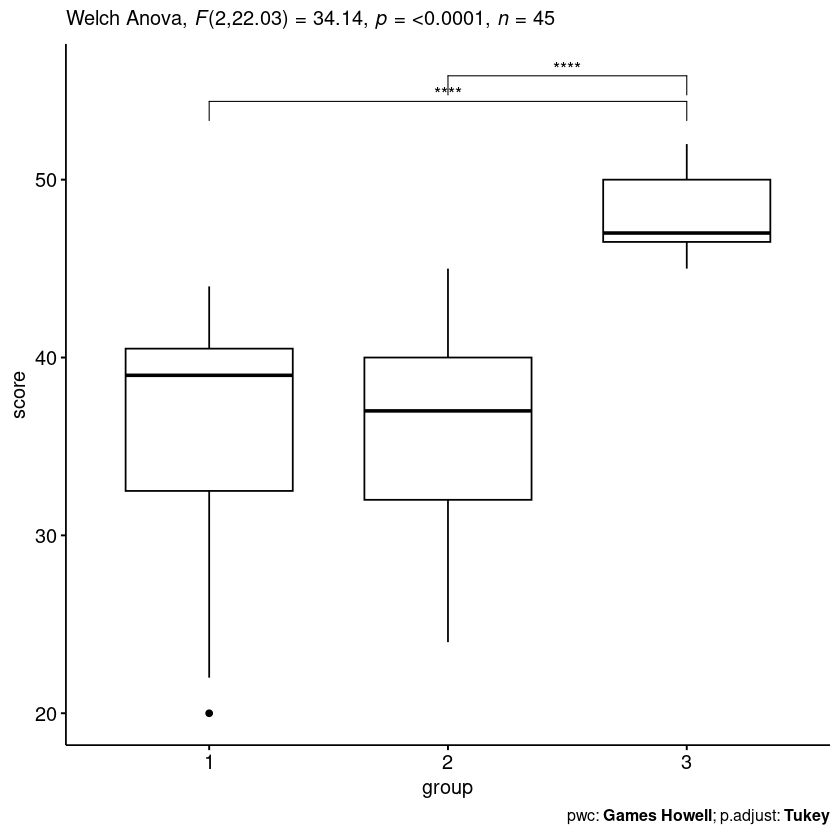

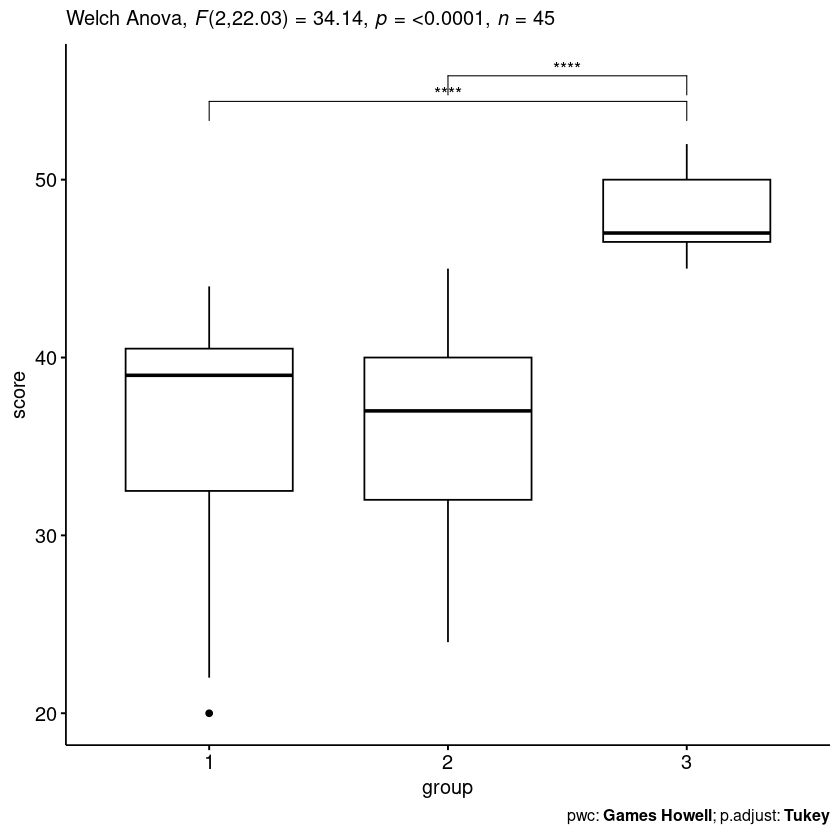

In [27]:
rs.ght <- data %>% games_howell_test(score ~group)
rs.ght
rs.ght2 <- rs.ght %>% add_xy_position(x = "group")
ggboxplot(data, x = "group", y = "score") + stat_pvalue_manual(rs.ght2, hide.ns = TRUE) + labs(
subtitle = get_test_label(rs.aovw, detailed = TRUE),caption = get_pwc_label(rs.ght2))
# ou two sample t-test
rs.tt <- data %>% pairwise_t_test(score ~ group, pool.sd = FALSE, p.adjust.method =
"bonferroni")
rs.tt
rs.tt2 <- rs.ght %>% add_xy_position(x = "group")
ggboxplot(data, x = "group", y = "score") + stat_pvalue_manual(rs.tt2, hide.ns = TRUE) + labs(
  subtitle = get_test_label(rs.aovw, detailed = TRUE), caption = get_pwc_label(rs.tt2)
)

## Ennonce 2

In [59]:
data2 <- read.csv("data/score.csv", header = TRUE)
head(data2)

,Individu,genre,dose,score
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,6
2,2,1,1,6
3,3,1,1,3
4,4,1,1,5
5,5,1,1,6
6,6,1,1,4


In [60]:
data2 <- data2[, -1]
head(data2)

,genre,dose,score
,<dbl>,<dbl>,<dbl>
1,1,1,6
2,1,1,6
3,1,1,3
4,1,1,5
5,1,1,6
6,1,1,4


In [61]:
data2 <- data2 %>%
  mutate(genre = as.factor(genre),
         dose = as.factor(dose))


In [62]:
head(data2)

,genre,dose,score
,<fct>,<fct>,<dbl>
1,1,1,6
2,1,1,6
3,1,1,3
4,1,1,5
5,1,1,6
6,1,1,4


genre,dose,variable,n,mean,sd
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,score,12,4.583,1.084
1,2,score,12,7.083,0.900
2,1,score,12,3.583,2.234
2,2,score,12,2.500,1.732


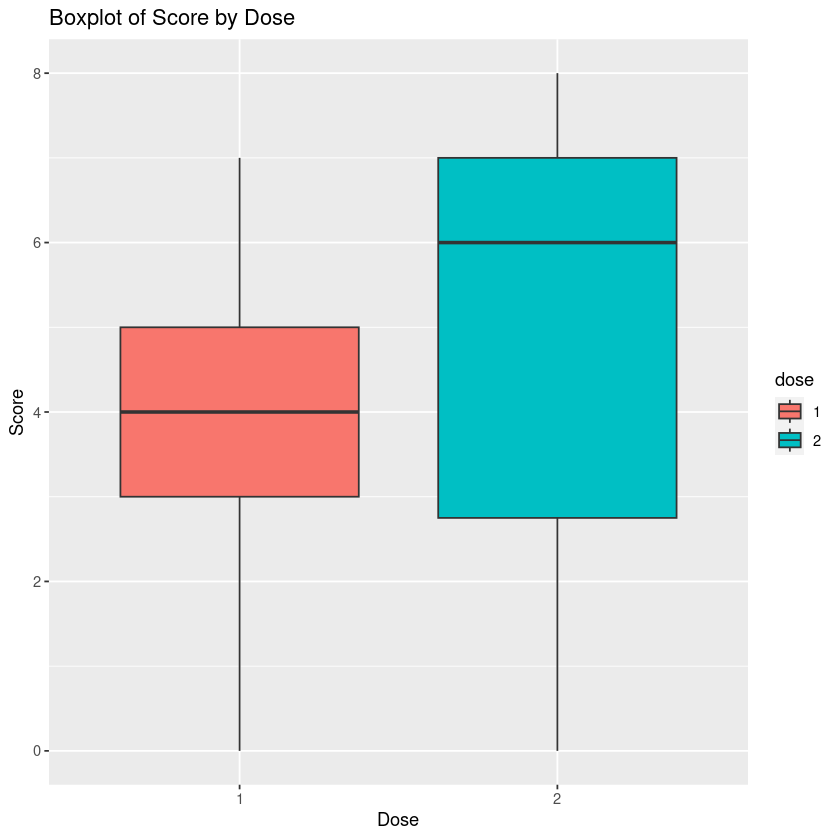

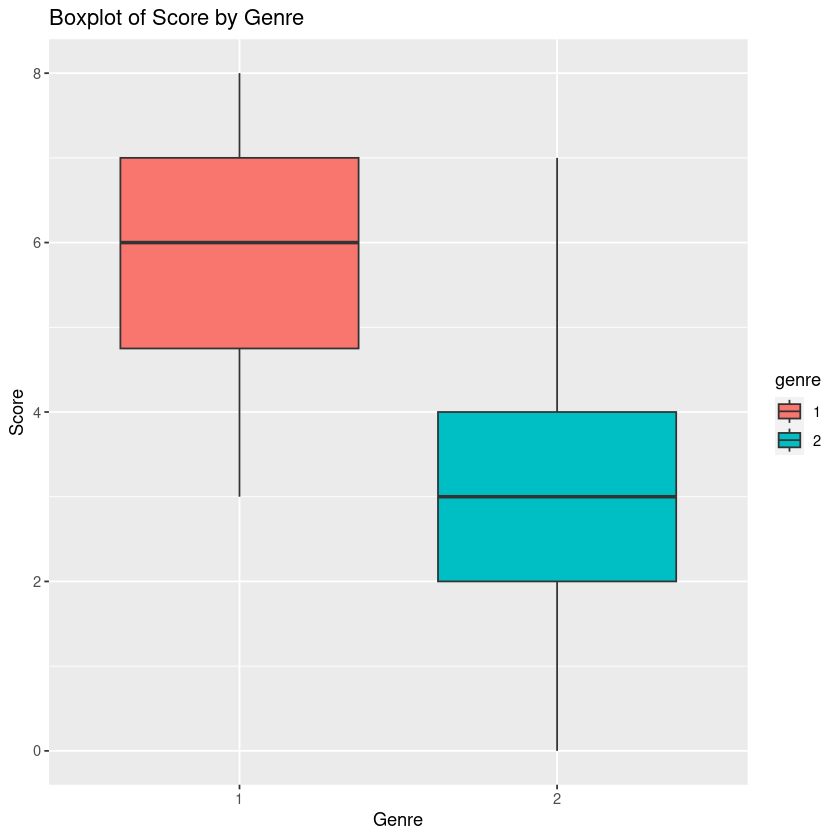

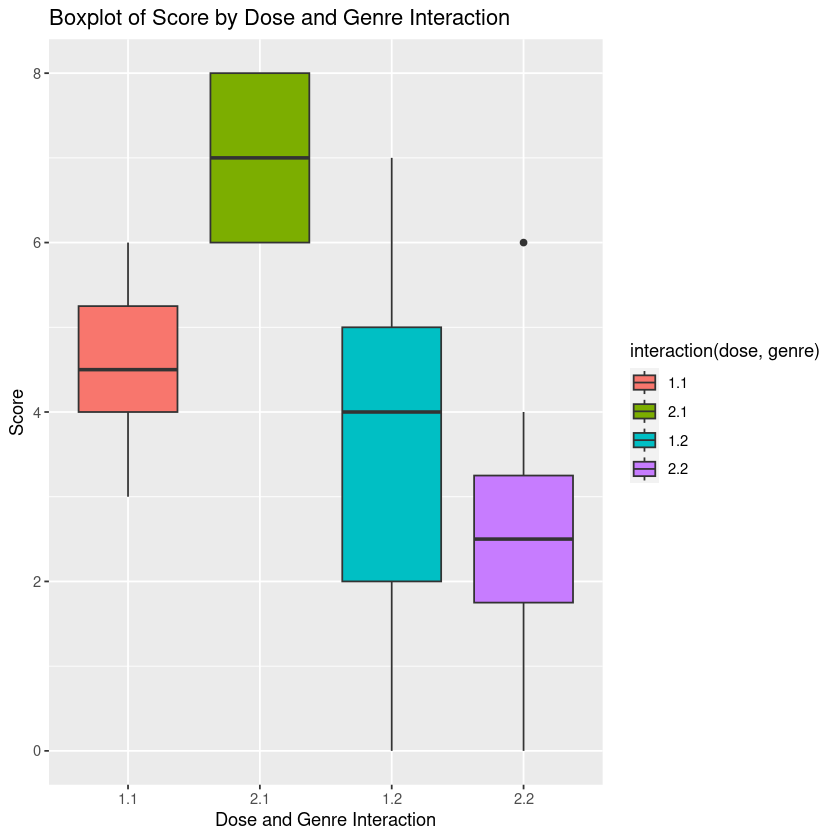

In [78]:
data2 %>% group_by(genre, dose) %>% get_summary_stats(score, type = "mean_sd")

ggplot(data2, aes(x = dose, y = score, fill = dose)) +
  geom_boxplot() +
  labs(x = "Dose", y = "Score") +
  ggtitle("Boxplot of Score by Dose")

ggplot(data2, aes(x = genre, y = score, fill = genre)) +
  geom_boxplot() +
  labs(x = "Genre", y = "Score") +
  ggtitle("Boxplot of Score by Genre")

# Assuming data2 is your dataset
# If your dataset does not have a variable named 'genre', replace it with the actual variable name

# Create a boxplot for the interaction of 'dose' and 'genre'
ggplot(data2, aes(x = interaction(dose, genre), y = score, fill = interaction(dose, genre))) +
  geom_boxplot() +
  labs(x = "Dose and Genre Interaction", y = "Score") +
  ggtitle("Boxplot of Score by Dose and Genre Interaction")



In [79]:
# faire l'anova de score par genre et dose
rs.aov <- Anova(lm(score~dose + genre, data=data2))
anova_summary(rs.aov)
rs.aov <- aov(score ~ dose + genre + interaction(dose, genre), data = data2 )
summary(rs.aov)
#
rs.aov <- data2 %>% anova_test(score ~ dose + genre)
rs.aov
#
rs.aovw <- data2 %>% welch_anova_test(score ~ dose + genre)
rs.aovw

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,dose,1,45,1.827,1.83e-01,,0.039
2,genre,1,45,28.383,3.07e-06,*,0.387


                         Df Sum Sq Mean Sq F value   Pr(>F)    
dose                      1   6.02    6.02   2.414 0.127433    
genre                     1  93.52   93.52  37.494 2.22e-07 ***
interaction(dose, genre)  1  38.52   38.52  15.443 0.000297 ***
Residuals                44 109.75    2.49                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,dose,1,45,1.827,1.83e-01,,0.039
2,genre,1,45,28.383,3.07e-06,*,0.387


,.y.,n,statistic,DFn,DFd,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,score,48,28.49,3,23.40739,5.49e-08,Welch ANOVA
